<a href="https://colab.research.google.com/github/Rahafcell/SHAI--Assignment/blob/main/LSTM_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Load the dataset
df = pd.read_csv('AAPL.csv')

# Display the first few rows of the dataset
print(df.head())


         Date        Open        High         Low       Close   Adj Close  \
0  2023-07-03  193.779999  193.880005  191.759995  192.460007  191.443314   
1  2023-07-05  191.570007  192.979996  190.619995  191.330002  190.319275   
2  2023-07-06  189.839996  192.020004  189.199997  191.809998  190.796722   
3  2023-07-07  191.410004  192.669998  190.240005  190.679993  189.672684   
4  2023-07-10  189.259995  189.990005  187.039993  188.610001  187.613632   

     Volume  
0  31458200  
1  46920300  
2  45094300  
3  46778000  
4  59922200  


In [ ]:
# Filter the 'Close' price
data = df['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [ ]:
# Split the data into training and testing sets
training_data_len = int(np.ceil(len(scaled_data) * .95))

train_data = scaled_data[0:int(training_data_len), :]
test_data = scaled_data[training_data_len - 60:, :]

In [ ]:
# Create the training data set
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

1/1 [==============================] - 1s 873ms/step


<ipython-input-7-c23cc197c2d8>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


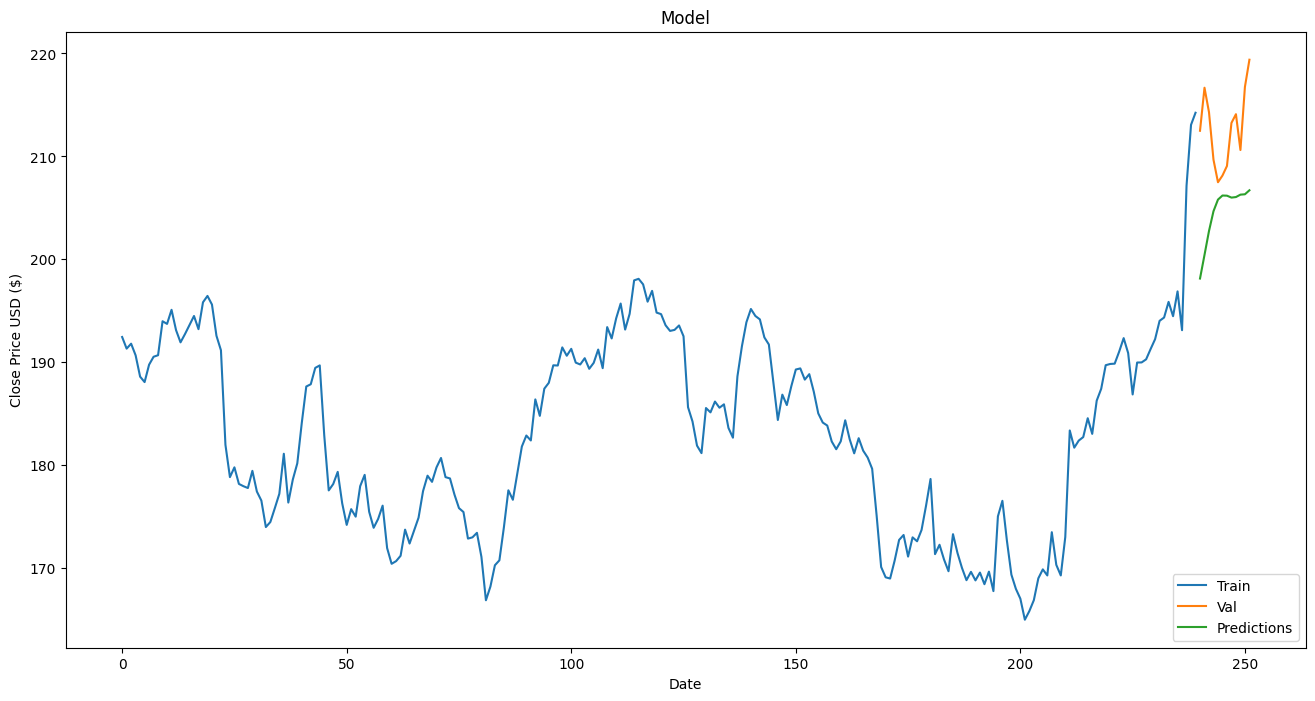

In [ ]:

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Create the testing data set
x_test = []
y_test = data[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the x_test to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Plot the data
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()